<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Guadalupe Cura

## INTRODUCCIÓN
    Las funciones senoidales son funciones de onda periódicas y son utilizadas en el análisis de señales, ya que, mediante la transformada de Fourier, cualquier señal periódica se puede representar como combinación de senos y cosenos.
    Una señal senoidal se puede expresar como:
$$
\text{sen}(t) = Amplitud \cdot \sin\!\big( 2\pi \,. frecuencia . \, t + ph \big) + dc      \qquad      (1)
$$
  
    Cuando se quiere digitalizar una onda, lo que se hace es, a partir de la ecuación de onda original, se busca reconstruir la misma mediante la toma de una serie de muestras. Dichas muestras se dan con una cierta frecuencia de muestreo, es decir, determinadas muestras en un segundo. 
$$
fm = \frac{1}{T_(muestreo)}.                               \qquad                             (2)
$$

    Es aquí donde entra el importante teorema de Nyquist, el cual establece que, para reconstruir una señal analógica continua, utilizando una serie de muestras, la frecuencia de muestreo debe ser al menos el doble que la frecuencia máxima de la señal.
$$    
\text{fm}>=2fs.         \qquad                (3)
$$   

    Lo que puede suceder si se toma una frecuencia de muestreo menor, es el efecto de Aliasing, donde la señal reconstruida tiene una frecuencia distinta a la frecuencia de la señal original. Esto se debe a que ocurre un solapamiento en las señales.
    Para la reconstrucción de señales, es importante evitar que suceda este efecto.
    Otro aspecto fundamental es la modulación en amplitud (AM), que consiste en modificar la amplitud de una portadora senoidal en función de una señal moduladora. Matemáticamente, se representa como
$$
modulación=A_0 . sin(\omega_0 .t) . A_1 . sin(\omega_1 .t)    \qquad      (4) 
$$

    Lo que se hace entonces es multiplicar ambas señales, la portadora y la moduladora. Al utilizar la entidad matemática de multiplicación de funciones senoidales, se obtiene una ecuación donde se puede observar que el resultado va a ser la superposición de dos funciones cosenoidales.
$$
modulación=\frac{A_0 . A_1}{2} [cos(\omega_0 .t-\omega_1 .t)-cos(\omega_0 .t+\omega_1 .t)]      \qquad    (5)       
$$

    Para desarrollar un poco la identidad, comenzamos utilizando la forma exponencial de las funciones senoidales
$$
sen(\omega_0 .t).sen(\omega_1 . t)=\frac{e^{j.\omega_0.t} - e^{-j.\omega_0.t}}{2j} . \frac{e^{j.\omega_1.t} - e^{-j.\omega_1.t}}{2j} 
$$
$$
(-4) . sen(\omega_0 .t).sen(\omega_1 . t)=(e^{j.\omega_0.t} - e^{-j.\omega_0.t}) .(e^{j.\omega_1.t} - e^{-j.\omega_1.t}) 
$$
$$
(-4) . sen(\omega_0 .t).sen(\omega_1 . t)=(e^{j.t.(\omega_0+\omega_1)} - e^{j.t.(\omega_0-\omega_1)}- e^{j.t.(-\omega_0 + \omega_1)}+e^{-j.t.(\omega_0 + \omega_1)}
$$

    Luego de reagrupar las exponenciales, se obtiene lo siguiente
$$
(-2). sen(\omega_0 .t).sen(\omega_1 . t)=\frac{1}{2} . [(e^{j.t.(\omega_0+\omega_1)}+e^{-j.t.(\omega_0 + \omega_1)})-(e^{j.t.(\omega_0-\omega_1)}+ e^{j.t.(-\omega_0 + \omega_1)})] \qquad    (6) 
$$

    Recordando que
$$
cos(\alpha)=\frac{e^{j.\alpha}+e^{-j.\alpha}}{2} \qquad    (7) 
$$

    Sustitiuyendo (7) en (6) se obtiene la identidad
$$
(-2). sen(\omega_0 .t).sen(\omega_1 . t)=cos(t.(\omega_0+\omega_1))-cos(t.(\omega_0-\omega_1)) \qquad    (8) 
$$

    La relación entre señales también se estudia desde un punto de vista matemático a través del concepto de ortogonalidad. Dos funciones se consideran ortogonales en un intervalo [a,b] si su producto interno se anula:
$$
<𝑓,𝑔>=\int_{a}^{b} f(t) 𝑔(𝑡) 𝑑𝑡=0   \qquad      (6)
$$

    En nuestro caso, al trabajar en discreto, el producto interno se puede tomar como:
$$
<𝑓,𝑔>=\sum_{n=0}^{N-1} f(t_n) \, g(t_n) \cdot \frac{1}{f_m}       \qquad (7)
$$
    
    La ortogonalidad resulta especialmente útil ya que garantiza independencia entre las señales. 
    Finalmente, la correlación se emplea como herramienta para cuantificar la similitud entre señales. La autocorrelación mide la semejanza de una señal consigo misma en función de un retardo, y se define como
$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} x(t)\,x(t+\tau)\,dt     \qquad      (8)
$$


    mientras que la correlación cruzada evalúa la similitud entre dos señales distintas 
$$
R_{xy}(\tau) = \int_{-\infty}^{\infty} x(t)\,y(t+\tau)\,dt  \qquad     (9)
$$

    Por último, es importante hacer una distinción en por qué en este trabajo se utiliza el dato de la energía y no la potencia para las diferentes señales. Esto se debe a que en el mundo continuo, las señales son periódicas e infinitas, por ende su energía es infinita y es aquí donde se calcula la potencia promedio. En este trabajo se van a utilizar y estudiar señales periódicas finitas, con N cantidad de datos. Debido a esto es que se puede calcular la energía siguiendo la siguiente ecuación donde se suma el cuadrado de los valores de la función en distintos puntos y se los divide por la frecuencia de muestreo:
$$
E=\sum_{n=0}^{N-1} (x_n)^2 . \frac{1}{fm}  \qquad     (10)
$$

    Todos estos parámetros son útiles para estudiar el comportamiento de las señales y poder utilizar sus propiedades y aplicarlas a sistemas.


    

## ANÁLISIS Y DESARROLLO
    Para comenzar con el trabajo semanal, se definió una función la cual, mediante la introducción de unos parámetros de entrada, genera una función senoidal (1) y como parámetros de salida tiene los datos del vector tiempo y los resultados de la función para una serie de muestreos.

La energía de la función senoidal es: 0.0025
La cantidad de muestras es: 500
El tiempo entre muestras es: 1e-05s


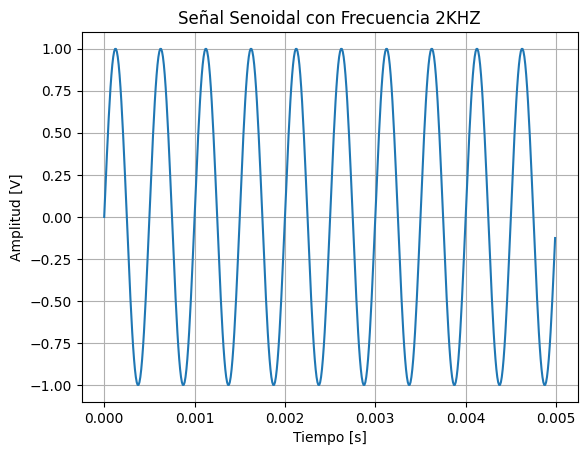

In [157]:
import numpy as np
import matplotlib.pyplot as plt

fm=100000 #frecuencia de muestreo
N=500     #cantidad de muestras
fs=2000   #frecuencia de la señal
dt=1/fm  #tiempo entre muestras

def funcion_seno(vc=1, dc=0, fs=None, ph=0, nn=N, fm=fm):
    t = np.linspace(0, N/fm, N, endpoint=False)
    sen=(vc*np.sin(2*np.pi*fs*t+ph)+dc)
    return t,sen

tt, yy = funcion_seno(vc=1, dc=0, fs=fs, ph=0, nn=N, fm=fm)

energia = np.sum(yy**2)*dt
muestras=len(yy)
tiempoMuestras= dt
print(f'La energía de la función senoidal es: {energia:.4f}')
print(f'La cantidad de muestras es: {muestras}')
print(f'El tiempo entre muestras es: {tiempoMuestras}s')

plt.figure(1)
plt.plot(tt, yy, label='{f} Hz')
plt.title('Señal Senoidal con Frecuencia 2KHZ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.show()

    Como se puede observar, la señal senoidal cumple con el teorema de Nyquist, y su representación es adecuada. Para seguir analizando la función, se variaron dos parámetros, el de la amplitud y el desfasaje de la función y se obtuvo, el siguiente resultado gráfico que acompaña al código.
    

La energía de la función senoidal desfasada es: 0.0225
La cantidad de muestras es: 500
El tiempo entre muestras es: 1e-05s


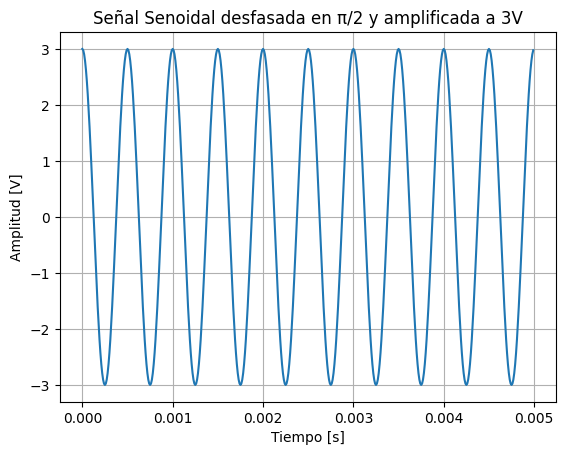

In [158]:
#LA FUNCION DEFASADA Y AMPLIFICADA EN PI/2
fm=100000 #frecuencia de muestreo
N=500    #cantidad de muestras
fs=2000   #frecuencia de la señal
dt=1/fm  #tiempo entre muestras


tt1, yy1 = funcion_seno(vc=3, dc=0, fs=fs, ph=np.pi/2, nn=N, fm=fm)

energia = np.sum(yy1**2)*dt
muestras=len(yy1)
tiempoMuestras= dt
print(f'La energía de la función senoidal desfasada es: {energia:.4f}')
print(f'La cantidad de muestras es: {muestras}')
print(f'El tiempo entre muestras es: {tiempoMuestras:}s')

plt.figure(2)
plt.plot(tt1, yy1)
plt.title('Señal Senoidal desfasada en π/2 y amplificada a 3V')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.show()

    Mediante un breve análisis vemos que ahora la función(t=0)=A, es decir, la función en tiempo cero está en un máximo. Esto se debe al desfasaje realizado. A su vez, en el gráfico se ve visualmente el cambio de amplitud, el cual antes era 1V, ahora es 3V. Con respecto a la energía, podemos observar que difiere a la energía de la función senoidal original. Esto se debe al cambio en amplitud.
$$
E_0*(\frac{A_1}{A_0})^2=E_1
$$


    

    Como siguiente punto, se graficó la señal modulada siguiendo (4). 

La energía de la función modulada es: 0.0025
La cantidad de muestras es: 500
El tiempo entre muestras es: 1e-05s


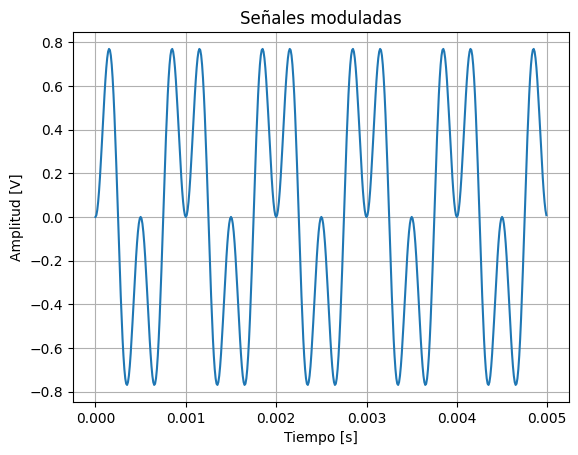

In [159]:
#LA SEÑAL MODULADA POR OTRA FUNCIÓN
fm=100000 #frecuencia de muestreo
N=500     #cantidad de muestras
fs=2000   #frecuencia de la señal
dt=1/fm  #tiempo entre muestras

def funcion_seno_moduladora(vc=1, dc=0, fs2=None, ph=0, nn=N, fm=fm):
    t = np.linspace(0, N/fm, N, endpoint=False)
    sen=(vc*np.sin(2*np.pi*fs2*t+ph)+dc)
    return t,sen

fs2=1000
tt2, yy2 = funcion_seno_moduladora(vc=1, dc=0, fs2=1000, ph=0, nn=N, fm=fm)

mody=yy2*yy

energia = np.sum(yy2**2)*dt
muestras=len(yy2)
tiempoMuestras= dt
print(f'La energía de la función modulada es: {energia:.4f}')
print(f'La cantidad de muestras es: {muestras}')
print(f'El tiempo entre muestras es: {tiempoMuestras}s')


plt.figure(3)
plt.plot(tt, mody)
plt.title('Señales moduladas')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.show()

    Como se ve en el gráfico, con la modulación que definió para las señales se puede observar que la señal cumple con (5). En el gráfico se observa que la función puede ser envuelta por una ecuación cosenoidal donde sus máximos y mínimos envuelvan a los dos picos de amplitud máxima del gráfico.

    
    Siguiendo en este línea, como siguiente paso se recortó la función para que la misma no alcanzara valores mayores a los del 75% de su potencia. Resultando entonces, en un gráfico donde las curvas características de la senoidal fueron reemplazadas por rectas de pendiente cero para los valores que se modificaron. 
    

La energía de la función recortada es: 0.0005
La cantidad de muestras es: 500
El tiempo entre muestras es: 1e-05s


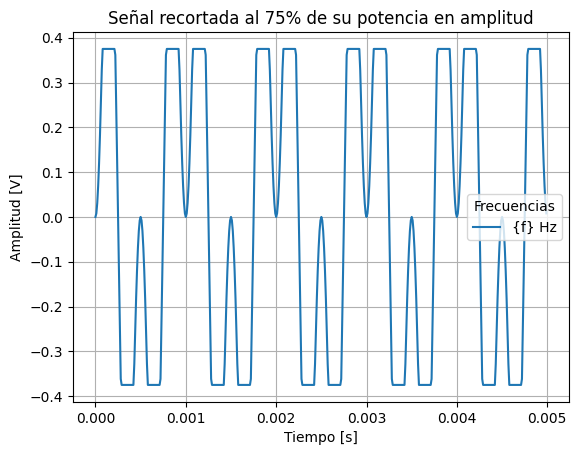

In [160]:
#Señal recortada al 75%
fm=100000 #frecuencia de muestreo
N=500     #cantidad de muestras
fs=2000   #frecuencia de la señal
tiempoMuestras=1/fm  #tiempo entre muestras

vc=1
potencia=(vc**2)/2

#Calulo el 75% de la potencia
threshold=potencia*0.75

yyRecortada=np.clip(mody,-threshold,threshold)

dt = 1/fm
energia = np.sum(yyRecortada**2)*dt
muestras=len(yyRecortada)
tiempoMuestras= dt
print(f'La energía de la función recortada es: {energia:.4f}')
print(f'La cantidad de muestras es: {muestras}')
print(f'El tiempo entre muestras es: {tiempoMuestras}s')

plt.figure(5)
plt.plot(tt, yyRecortada, label='{f} Hz')
plt.title('Señal recortada al 75% de su potencia en amplitud')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend(title="Frecuencias")
plt.grid(True)
plt.show()

    Nuevamente, la energía de la función disminuye gracias a que el gráfico luego de ser recortado reduce el área bajo la curva, integral de la que deriva la ecuación (10) la cual disminuye. Con esto se comprueba que, en discreto, este tipo de propiedades se mantienen.

    Para continuar con el desarrollo de la tarea se pidió generar una señal cuadrada. Para esto se llamó a la librería scipy y se utilizó la función signal.sqare y así poder generar la función deseada de manera rápida, solo indicando datos sobre la frecuencia de la señal.

La energía de la función cuadrada es: 0.0050
La cantidad de muestras es: 500
El tiempo entre muestras es: 1e-05s


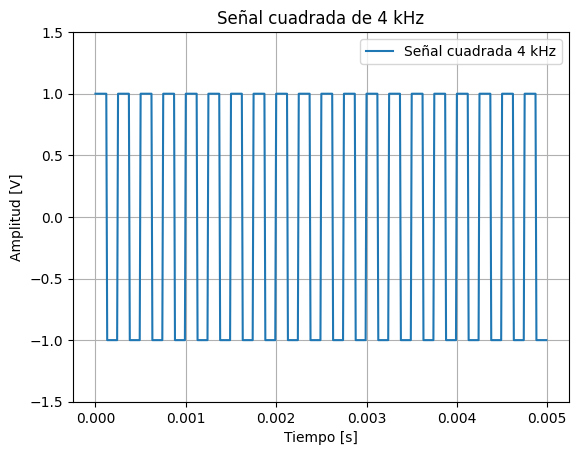

In [161]:
#Señal cuadrada
from scipy import signal #para hacer la señal cuadrada

# Parámetros
fs = 4000        # frecuencia de la señal (Hz)
T = 1/fs         # período (s)
fm = 100000     # frecuencia de muestreo (Hz) - mucho mayor a f
t = np.linspace(0, N/fm, N, endpoint=False)

# Señal cuadrada
sq_wave = signal.square(2 * np.pi * fs * t)

dt = 1/fm
energia = np.sum(sq_wave**2)*dt
muestras=len(sq_wave)
tiempoMuestras= dt
print(f'La energía de la función cuadrada es: {energia:.4f}')
print(f'La cantidad de muestras es: {muestras}')
print(f'El tiempo entre muestras es: {tiempoMuestras}s')

# Graficar

plt.figure(6)
plt.plot(t, sq_wave, label="Señal cuadrada 4 kHz")  # t en microsegundos
plt.title("Señal cuadrada de 4 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

        Otra de las consignas fue la de generar un pulso cuadrado. Para ello se definió un vector que por defecto todas sus coordenadas eran cero y luego se tomó un intervalo de 10ms y se cambiaron los valores del vector a 1[V].

La energía del pulso es: 0.0100
La cantidad de muestras es: 2000
El tiempo entre muestras es: 1e-05s


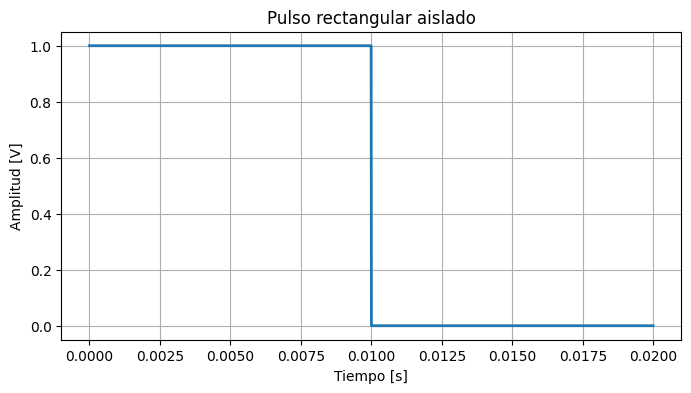

In [129]:
#pulso rectangular

# Parámetros
fm = 100000        # frecuencia de muestreo [Hz]
T = 0.02           # tiempo total de simulación [s]
A = 1.0           # amplitud del pulso
t0 = 0       # inicio del pulso [s]
Tp = 10e-3        # duración del pulso [s]

# Vector de tiempo
t = np.arange(0, T, 1/fm)

# Defino el pulso
pulso = np.zeros_like(t)                   # todo en cero
pulso[(t >= t0) & (t < t0 + Tp)] = A       # intervalo activo

dt = 1/fm
energia = np.sum(pulso**2)*dt
muestras=len(pulso)
tiempoMuestras= dt
print(f'La energía del pulso es: {energia:.4f}')
print(f'La cantidad de muestras es: {muestras}')
print(f'El tiempo entre muestras es: {tiempoMuestras}s')

# Gráfico
plt.figure(figsize=(8,4))
plt.plot(t, pulso, lw=2)
plt.title("Pulso rectangular aislado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()


    Como ya fue establecido, las señales ortogonales son importantes y utilizadas en nuestra vida diaria. Es por eso que como siguiente ejercicio se verificó ortogonalidad entre funciones mediante la definición de una función que realiza el producto interno entre dos señales. Si el producto interno resulta en un número igual a cero o muy cercano al mismo, de ahí la tolerancia, se dice que son ortogonales. En caso contrario se indica que no son ortogonales. 
    

In [166]:
#Verificar ortogonalidad


def verificar_ortogonalidad(y1, y2,senal1, senal2):
    if len(y1) != len(y2):
        raise ValueError("Las señales deben tener la misma longitud")
    # Producto interno discreto usando np.dot
    tol = 1e-10
    dt= 1/100000
    prodInterno=np.dot(y1,y2)*dt
    if abs(prodInterno)<tol:
        print(f'Las señales {senal1} y la {senal2} son ortogonales, con producto interno: {prodInterno}')
    else:
        print(f'Las señales {senal1} y la {senal2} no son ortogonales, su producto interno es: {prodInterno}')
    return 

# Caso 1: señal base vs desfazada
verificar_ortogonalidad(yy, yy1,'senoidal original','senoidal desfasada y amplificada')

# Caso 2: señal base vs modulada
verificar_ortogonalidad(yy, mody,'senoidal original','modulada')

# Caso 3: señal base vs recortada
verificar_ortogonalidad(yy, yyRecortada,'senoidal original','recortada')

# Caso 4: señal base vs señal cuadrada
min_len = min(len(yy), len(sq_wave)) #Se hace esto para que tengan el mismo tamaño
verificar_ortogonalidad(yy[:min_len], sq_wave[:min_len],'senoidal original', 'cuadrada')


# Caso 5: señal base vs pulso rectangular
min_len = min(len(yy), len(pulso)) #aca tamb
verificar_ortogonalidad(yy[:min_len], pulso[:min_len],'senoidal original','del pulso')



Las señales senoidal original y la senoidal desfasada y amplificada son ortogonales, con producto interno: -6.7906791301197704e-18
Las señales senoidal original y la modulada son ortogonales, con producto interno: 2.326697862153893e-21
Las señales senoidal original y la recortada son ortogonales, con producto interno: -1.4561052016914823e-19
Las señales senoidal original y la cuadrada son ortogonales, con producto interno: -4.254929741875913e-19
Las señales senoidal original y la del pulso son ortogonales, con producto interno: -1.0963452368173422e-19


    Según el código, todas las funciones son ortogonales. Esto resulta intuitivo para el primer caso, donde tenemos las funciones senoidales desplazadas en pi/2. Para el resto de los casos podría haber un error en el código o ser que por el intervalo agarrado, las funciones sean ortogonales justo allí. 

    Para seguir con el análisis se graficó la autocorrelación entre señales

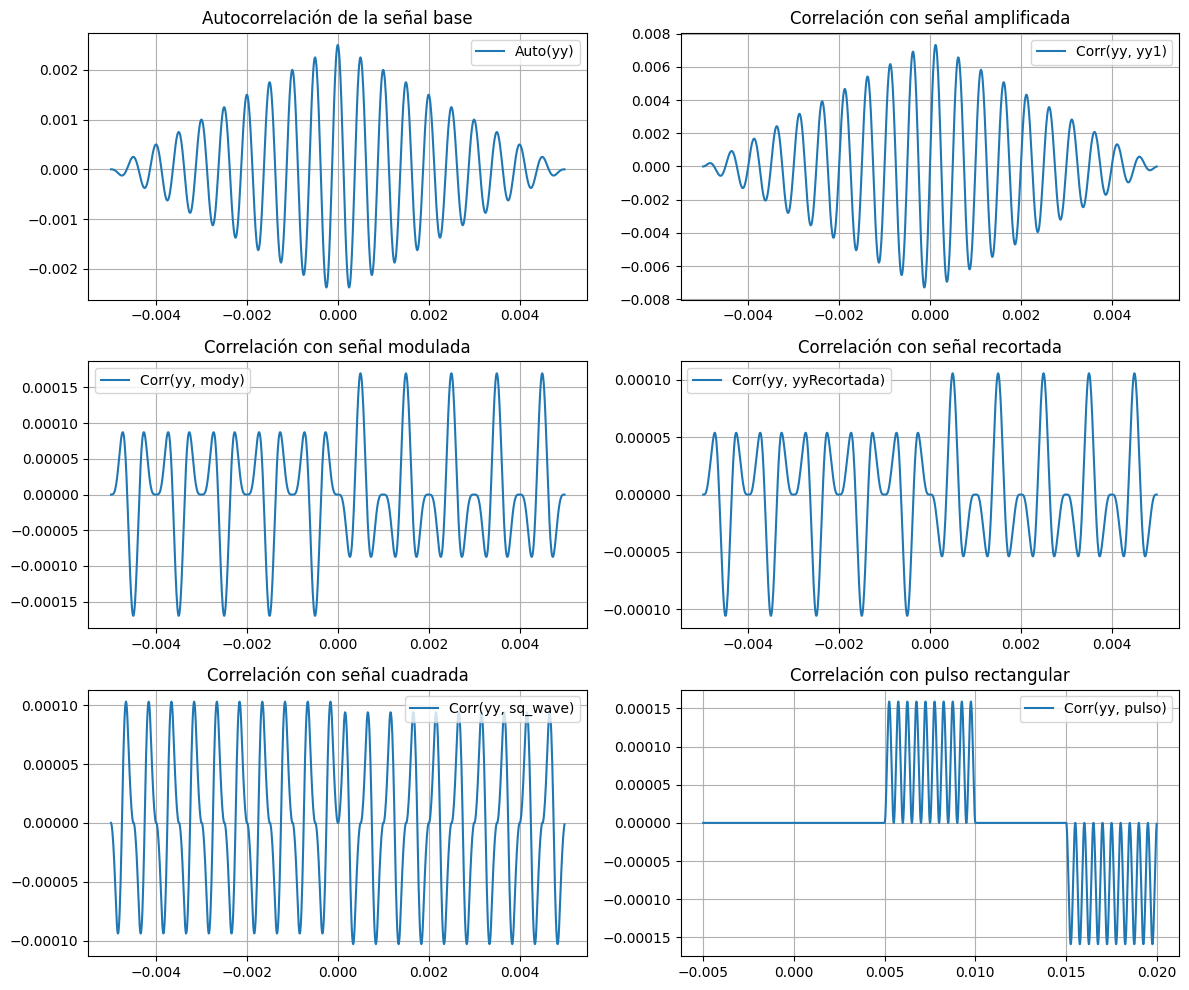

In [163]:
#------------------------------------------------------
# Autocorrelación

auto_yy = np.correlate(yy, yy, mode="full")*dt
lags_auto = np.arange(-len(yy)+1, len(yy))*dt
#print("El coeficiente de autocorrelación de la senoidal es: ",auto_yy)

# Correlaciones cruzadas
corr_y_y1 = np.correlate(yy, yy1, mode="full")*dt
lags_y1 = np.arange(-len(yy)+1, len(yy1))*dt
#print("El coeficiente de correlación entre la senoidal desfasada y la senoidal original es: ",corr_y_y1)

corr_y_mody = np.correlate(yy, mody, mode="full")*dt
lags_mody = np.arange(-len(yy)+1, len(mody))*dt
#print("El coeficiente de correlación entre la señal modulada y la senoidal es: ",corr_y_mody)

corr_y_rec = np.correlate(yy, yyRecortada, mode="full")*dt
lags_rec = np.arange(-len(yy)+1, len(yyRecortada))*dt
#print("El coeficiente de correlación entre la función recortada y la senoidal es: ",corr_y_rec)

corr_y_sq = np.correlate(yy, sq_wave, mode="full")*dt
lags_sq = np.arange(-len(yy)+1, len(sq_wave))*dt
#print("El coeficiente de correlación entre la señal cuadrada y la senoidal es: ",corr_y_sq)

corr_y_pulso = np.correlate(yy, pulso, mode="full")*dt
lags_pulso = np.arange(-len(yy)+1, len(pulso))*dt
#print("El coeficiente de correlación entre el pulso y la senoidal es: ",corr_y_pulso)

# Gráficos
plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
plt.plot(lags_auto, auto_yy, label="Auto(yy)")
plt.title("Autocorrelación de la señal base")
plt.legend(); plt.grid()

plt.subplot(3,2,2)
plt.plot(lags_y1, corr_y_y1, label="Corr(yy, yy1)")
plt.title("Correlación con señal amplificada")
plt.legend(); plt.grid()

plt.subplot(3,2,3)
plt.plot(lags_mody, corr_y_mody, label="Corr(yy, mody)")
plt.title("Correlación con señal modulada")
plt.legend(); plt.grid()

plt.subplot(3,2,4)
plt.plot(lags_rec, corr_y_rec, label="Corr(yy, yyRecortada)")
plt.title("Correlación con señal recortada")
plt.legend(); plt.grid()

plt.subplot(3,2,5)
plt.plot(lags_sq, corr_y_sq, label="Corr(yy, sq_wave)")
plt.title("Correlación con señal cuadrada")
plt.legend(); plt.grid()

plt.subplot(3,2,6)
plt.plot(lags_pulso, corr_y_pulso, label="Corr(yy, pulso)")
plt.title("Correlación con pulso rectangular")
plt.legend(); plt.grid()

plt.tight_layout()
plt.show()


    Por los gráficos podemos ver en qué momentos las diferentes señales son similares. 
    El primer gráfico se observa que en t=0 tenemos el máximo, el punto donde las señales son más similares. Esto coincide con el estudio de estas ya que al estar estudiando autocorrelaciones cuando el desplazamiento de la función es cero, ambas señales son idénticas. A medida que se aleja del origen estos máximos disminuyen. 
    Para la función desplazada, el máximo también se desplaza y se encuentra en otro punto. En cero vemos que vale cero. Esto tiene sentido ya que se debe correr la función para que las mismas sean idénticas y a medida que se sigue con este desplazamiento la similitud disminuye. 
    La señal modulada y la señal recortada tienen gráficos similares pero con un notorio cambio en los valores máximos, lo cual es coherente ya que al recortar a la función en amplitud, se disminuye también la similitud entre la función modulada y la senoidal que antes guardaban un parecido entre amplitudes máximas. Los mínimos representan alineación pero en contrafase.
    Con respecto a la señal cuadrada, se puede ver que su máximo está cerca del cero pero que la función se mantiene bastante constante, en cambio para el pulso podemos observar que para el desplazamiento positivo tenemos una zona con máximos entre 0,005 y 0,010 y luego los mínimos que representan la contrafase. 
    

    Como fue demostrado en la introducción, el producto de las funciones senoidales resulta en una resta de cosenoidales. En el siguiente código se busca graficar esta igualdad para así demostrarla. 

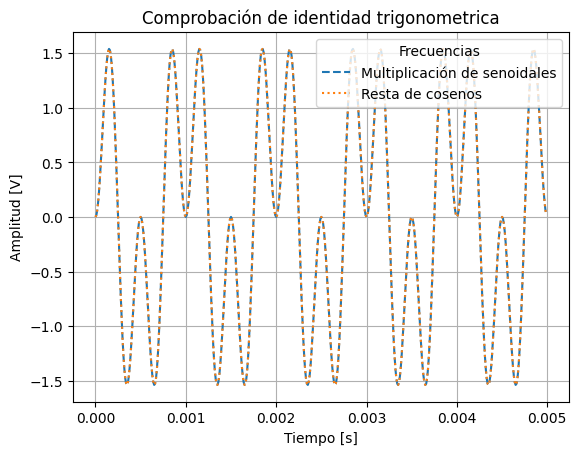

In [164]:
#-----------------------------
#IDENTIDAD TRIGONOMETRICA

def funcion_seno(vc=1, dc=0, fs=None, ph=0, nn=N, fm=fm):
    t=np.arange(0, nn) / fm
    sen=(vc*np.sin(2*np.pi*fs*t+ph)+dc)
    return t,sen

def funcion_coseno(vc=1, dc=0, fs=None, ph=0, nn=N, fm=fm):
    t=np.arange(0, nn) / fm
    cos=(vc*np.cos(2*np.pi*fs*t+ph)+dc)
    return t,cos


fs4=2000
tt4, yy4 = funcion_seno(vc=1, dc=0, fs=fs4, ph=0, nn=N, fm=fm)

fs5=1000
tt5, yy5 = funcion_seno(vc=1, dc=0, fs=fs5, ph=0, nn=N, fm=fm)

fs6= fs4-fs5
tt6, yy6 = funcion_coseno(vc=1, dc=0, fs=fs6, ph=0, nn=N, fm=fm)

fs7=fs4+fs5
tt7, yy7 = funcion_coseno(vc=1, dc=0, fs=fs7, ph=0, nn=N, fm=fm)


plt.plot(tt4, 2*yy4*yy5, label='Multiplicación de senoidales', linestyle='--')
plt.plot(tt,yy6-yy7 , label='Resta de cosenos', linestyle=':')
plt.title('Comprobación de identidad trigonometrica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend(title="Frecuencias")
plt.grid(True)
plt.show()

    Por último, se importó un audio de la página freesoung.org, y utilizando "wvfile" para la lectura del mismo, se graficó y se indicó su energía siguiendo la ecuación (10).

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5576\3566962613.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fm, data = wavfile.read("ruidos_olas.wav")  # fm = frecuencia de muestreo, data = array con muestras


Frecuencia de muestreo: 96000
La energía del sonido es: 30276759788.202667


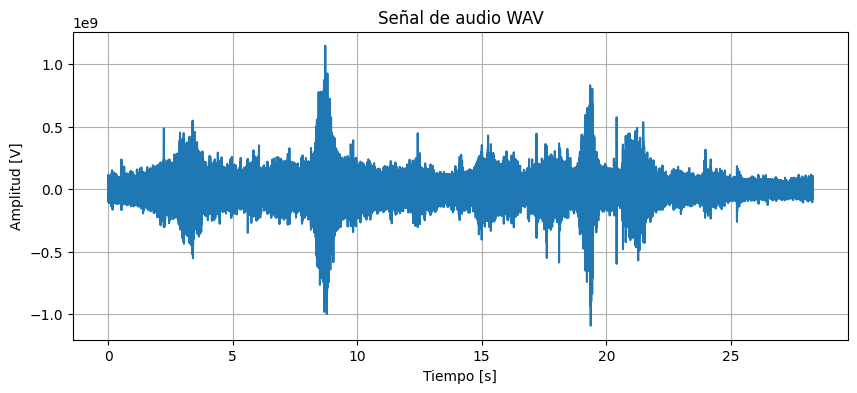

In [165]:
#Bonus
from scipy.io import wavfile
fm, data = wavfile.read("ruidos_olas.wav")  # fm = frecuencia de muestreo, data = array con muestras
if data.ndim > 1:   
    data = data[:,0] #si la info tiene más de un canal, hago esto para que utilice solo uno de los canales
    
print("Frecuencia de muestreo:", fm)

# Vector de tiempo
t = np.arange(len(data)) / fm
dt = 1/fm
energia = np.sum(np.abs(data**2))*dt

print(f'La energía del sonido es: {energia}')

plt.figure(figsize=(10,4))
plt.plot(t, data)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.title("Señal de audio WAV")
plt.grid()
plt.show()

## CONCLUSIONES

    Las señales y su análisis se basa en las propiedades matemáticas de la ecuación que lo define. 
    Gracias a estas propiedades es que se puede verificar similitud entre señales diferentes utilizando la correlación cruzada y evaluar la similitud dentro de una misma señal, dar su periodicidad y determinar la potencia promedio.
    El concepto de ortogonalidad entre funciones constituye una base matemática poderosa, ya que asegura independencia entre señales, lo cual es esencial en la transmisión de información y en el análisis mediante series de Fourier. A través de esta propiedad se pueden construir sistemas que separan y procesan señales sin interferencia mutua.
    Por otro lado, la modulación y el desfasaje aparecen como técnicas que permiten desplazar señales en frecuencia y fase, respectivamente, con el fin de adaptarlas a canales de transmisión o combinarlas con otras.
    En conjunto, estos conceptos conforman un marco teórico y práctico que permite comprender, modelar y manipular señales de manera efectiva, sentando las bases para aplicaciones en comunicaciones, procesamiento digital y sistemas físicos en general.

## AUTOEVALUACIÓN DEL APRENDIZAJE
    En este trabajo semanal aprendí sobre las propiedades de las señales. Me quedó claro la diferencia entre la frecuencia de la función y la frecuencia de muestreo, que es algo que no entendía muy bien en la TS0. 
    Resolví la tarea pero tengo dudas en la parte donde se calcula ortogonalidad y la correlación. Los resultados que me da no parecen ser los correctos y no encuentro el error. 
    Otro comentario es la modulación, la cual la definí como lo hicimos en clase pero investigando encontré otra ecuación:
$$
 modulación= (1+x_m)*x_o
$$
    
    No la terminé utilizando porque no fue la que definimos en clase.